In this lecture, we'll be using the dataset quality.csv to build a logistic regression model in R.

The variables in the dataset quality.csv are as follows:

- ***MemberID*** numbers the patients from 1 to 131, and is just an identifying number.
- ***InpatientDays*** is the number of inpatient visits, or number of days the person spent in the hospital.
- ***ERVisits*** is the number of times the patient visited the emergency room.
- ***OfficeVisits*** is the number of times the patient visited any doctor's office.
- ***Narcotics*** is the number of prescriptions the patient had for narcotics.
- ***DaysSinceLastERVisit*** is the number of days between the patient's last emergency room visit and the end of the study period (set to the length of the study period if they never visited the ER). 
- ***Pain*** is the number of visits for which the patient complained about pain.
- ***TotalVisits*** is the total number of times the patient visited any healthcare provider.
- ***ProviderCount*** is the number of providers that served the patient.
- ***MedicalClaims*** is the number of days on which the patient had a medical claim.
- ***ClaimLines*** is the total number of medical claims.
- ***StartedOnCombination*** is whether or not the patient was started on a combination of drugs to treat their diabetes (TRUE or FALSE).
- ***AcuteDrugGapSmall*** is the fraction of acute drugs that were refilled quickly after the prescription ran out.
- ***PoorCare*** is the outcome or dependent variable, and is equal to 1 if the patient had poor care, and equal to 0 if the patient had good care.

### Logistic Regression in R

In [11]:
quality = read.csv('./dataset/quality.csv')
str(quality)

'data.frame':	131 obs. of  14 variables:
 $ MemberID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ InpatientDays       : int  0 1 0 0 8 2 16 2 2 4 ...
 $ ERVisits            : int  0 1 0 1 2 0 1 0 1 2 ...
 $ OfficeVisits        : int  18 6 5 19 19 9 8 8 4 0 ...
 $ Narcotics           : int  1 1 3 0 3 2 1 0 3 2 ...
 $ DaysSinceLastERVisit: num  731 411 731 158 449 ...
 $ Pain                : int  10 0 10 34 10 6 4 5 5 2 ...
 $ TotalVisits         : int  18 8 5 20 29 11 25 10 7 6 ...
 $ ProviderCount       : int  21 27 16 14 24 40 19 11 28 21 ...
 $ MedicalClaims       : int  93 19 27 59 51 53 40 28 20 17 ...
 $ ClaimLines          : int  222 115 148 242 204 156 261 87 98 66 ...
 $ StartedOnCombination: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ AcuteDrugGapSmall   : int  0 1 5 0 0 4 0 0 0 0 ...
 $ PoorCare            : int  0 0 0 0 0 1 0 0 1 0 ...


In [12]:
table(quality$PoorCare)


 0  1 
98 33 

In [13]:
# Baseline model
98/131

[1] 0.7480916

Requires to install caTools
```R
install.packages("caTools")
```

In [14]:
library("caTools")

In [15]:
set.seed(88)
split = sample.split(quality$PoorCare, SplitRatio = 0.75)

In [16]:
split

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25] FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [37] FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
 [49] FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
[109]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[121] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE

In [17]:
qualityTrain = subset(quality, split == TRUE)
qualityTest = subset(quality, split == FALSE)

In [18]:
nrow(qualityTrain)

[1] 99

In [19]:
nrow(qualityTest)

[1] 32

In [20]:
QualityLog = glm(PoorCare ~ OfficeVisits + Narcotics, data=qualityTrain, family=binomial)

In [21]:
summary(QualityLog)


Call:
glm(formula = PoorCare ~ OfficeVisits + Narcotics, family = binomial, 
    data = qualityTrain)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.06303  -0.63155  -0.50503  -0.09689   2.16686  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.64613    0.52357  -5.054 4.33e-07 ***
OfficeVisits  0.08212    0.03055   2.688  0.00718 ** 
Narcotics     0.07630    0.03205   2.381  0.01728 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111.888  on 98  degrees of freedom
Residual deviance:  89.127  on 96  degrees of freedom
AIC: 95.127

Number of Fisher Scoring iterations: 4


In [22]:
predictTrain = predict(QualityLog, type='response')

In [23]:
summary(predictTrain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06623 0.11912 0.15967 0.25253 0.26765 0.98456 

In [24]:
tapply(predictTrain, qualityTrain$PoorCare, mean)

0         1 
0.1894512 0.4392246

For the Question

In [25]:
QualityLog2 = glm(PoorCare ~ StartedOnCombination + ProviderCount, data=qualityTrain, family=binomial)
summary(QualityLog2)


Call:
glm(formula = PoorCare ~ StartedOnCombination + ProviderCount, 
    family = binomial, data = qualityTrain)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.61826  -0.72782  -0.64555  -0.08407   1.94662  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -2.00097    0.55097  -3.632 0.000282 ***
StartedOnCombinationTRUE  1.95230    1.22342   1.596 0.110541    
ProviderCount             0.03366    0.01983   1.697 0.089706 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111.89  on 98  degrees of freedom
Residual deviance: 104.37  on 96  degrees of freedom
AIC: 110.37

Number of Fisher Scoring iterations: 4


### Thresholding

In [28]:
# threshold = 0.5
table(qualityTrain$PoorCare, predictTrain > 0.5)

   
    FALSE TRUE
  0    70    4
  1    15   10

In [30]:
sensitivity = 10 / 25

In [31]:
specificity = 70 / 74

In [32]:
table(qualityTrain$PoorCare, predictTrain > 0.7)

   
    FALSE TRUE
  0    73    1
  1    17    8

In [33]:
sensitivity = 8 / 25

In [34]:
specificity = 73 / 74

In [35]:
table(qualityTrain$PoorCare, predictTrain > 0.2)

   
    FALSE TRUE
  0    54   20
  1     9   16

In [36]:
sensitivity = 16 / 25
specificity = 54 / 74

### ROC Curves

Requires to install ROCR
```R
install.packages("ROCR")
```

In [37]:
library("ROCR")

Loading required package: gplots


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




In [38]:
ROCRpred = prediction(predictTrain, qualityTrain$PoorCare)

In [39]:
ROCRperf = performance(ROCRpred, "tpr", "fpr")

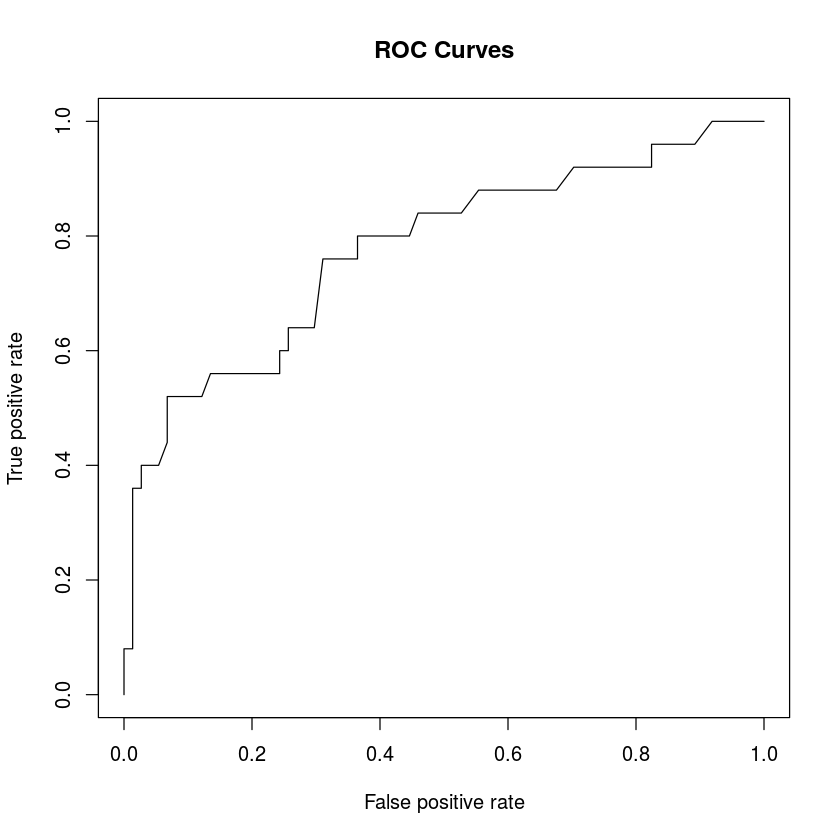

In [41]:
plot(ROCRperf, main='ROC Curves')

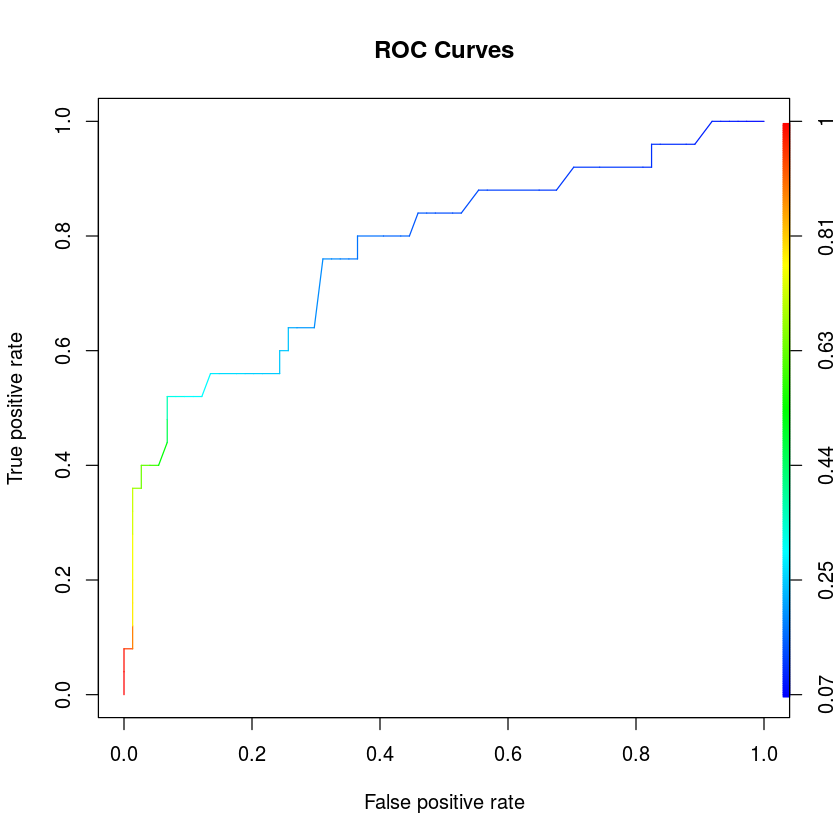

In [42]:
plot(ROCRperf, main='ROC Curves', colorize=TRUE)

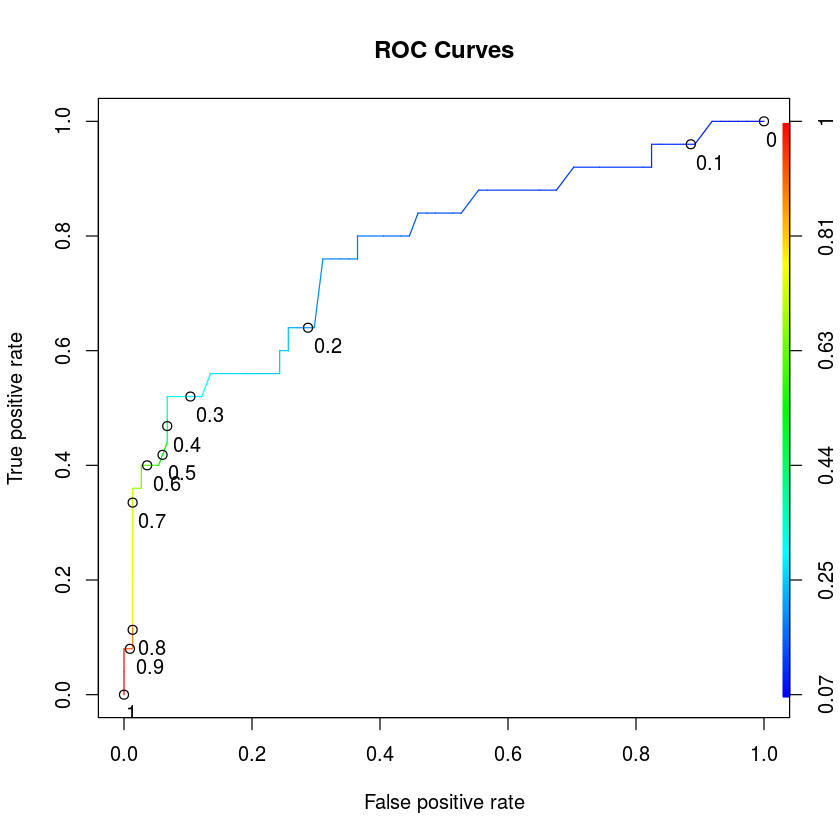

In [43]:
plot(ROCRperf, main='ROC Curves', colorize=TRUE, print.cutoffs.at=seq(0, 1, 0.1), text.adj=c(-0.2, 1.7))

### Interpreting the model

In [44]:
predictTest = predict(QualityLog, type="response", newdata=qualityTest)

In [45]:
ROCRpredTest = prediction(predictTest, qualityTest$PoorCare)
auc = as.numeric(performance(ROCRpredTest, "auc")@y.values)

In [46]:
auc

[1] 0.7994792

The AUC of a model has the following nice interpretation: given a random patient from the dataset who actually received poor care, and a random patient from the dataset who actually received good care, the AUC is the perecentage of time that our model will classify which is which correctly.